# Bonus: Temperature Analysis I

In [1]:
# Dependencies

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from scipy import stats

In [2]:
# "tobs" is "temperature observations"

df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head(5)

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
# Convert the date column format from string to datetime

df.date=pd.to_datetime(df['date'], format='%Y-%m-%d')

In [4]:
# Set the date column as the DataFrame index

df=df.set_index('date')
df.head(5)

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


### Compare June and December data across all years 

In [5]:
# June df

june_df=df[df.index.month==6]
june_df=june_df.dropna()
june_df

,station,prcp,tobs
date,,,
2010-06-01,USC00519397,0.00,78
2010-06-02,USC00519397,0.01,76
2010-06-03,USC00519397,0.00,78
2010-06-04,USC00519397,0.00,76
2010-06-05,USC00519397,0.00,77
...,...,...,...
2017-06-26,USC00516128,0.02,79
2017-06-27,USC00516128,0.10,74
2017-06-28,USC00516128,0.02,74


In [6]:
# December df

december_df=df[df.index.month==12]
december_df=december_df.dropna()
december_df

,station,prcp,tobs
date,,,
2010-12-01,USC00519397,0.04,76
2010-12-03,USC00519397,0.00,74
2010-12-04,USC00519397,0.00,74
2010-12-06,USC00519397,0.00,64
2010-12-07,USC00519397,0.00,64
...,...,...,...
2016-12-27,USC00516128,0.14,71
2016-12-28,USC00516128,0.14,71
2016-12-29,USC00516128,1.03,69


In [7]:
# June average temperature

june_tobs_mean=june_df['tobs'].mean()
june_tobs_mean

74.88754764930114

In [8]:
# December average temperature

dec_tobs_mean=december_df['tobs'].mean()
dec_tobs_mean

70.93024911032029

In [9]:
# June stats

june_df.describe()

,prcp,tobs
count,1574.000000,1574.000000
mean,0.136360,74.887548
std,0.335731,3.255695
min,0.000000,65.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [10]:
# December stats

december_df.describe()

,prcp,tobs
count,1405.000000,1405.000000
mean,0.216819,70.930249
std,0.541399,3.741578
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,81.000000


In [11]:
# June - tobs

all_june_tobs=june_df['tobs']
all_june_tobs

date
2010-06-01    78
2010-06-02    76
2010-06-03    78
2010-06-04    76
2010-06-05    77
              ..
2017-06-26    79
2017-06-27    74
2017-06-28    74
2017-06-29    76
2017-06-30    75
Name: tobs, Length: 1574, dtype: int64

In [34]:
# December - tobs

all_dec_tobs=december_df['tobs']
all_dec_tobs

date
2010-12-01    76
2010-12-03    74
2010-12-04    74
2010-12-06    64
2010-12-07    64
              ..
2016-12-27    71
2016-12-28    71
2016-12-29    69
2016-12-30    65
2016-12-31    65
Name: tobs, Length: 1405, dtype: int64

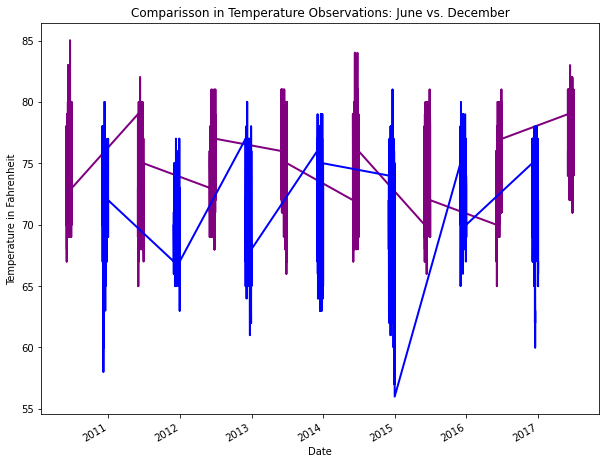

In [35]:
# Create collections of temperature data

june_line=all_june_tobs.plot(color='purple', linewidth=2, label='June', figsize=(10,8))
dec_line=all_dec_tobs.plot(color='blue', linewidth=2, label='December', figsize=(10,8))

plt.title('Comparisson in Temperature Observations: June vs. December')
plt.ylabel('Temperature in Fahrenheit')
plt.xlabel('Date')
plt.show()

The hypothesis being tested are:

- Null hypothesis (H0): The mean difference between the months of June and December is equal to 0.

- Alternative hypothesis (HA): The mean difference between the months of June and December is not equal to 0.

**
**If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.


In [41]:
# Run paired t-test

stats.ttest_ind(all_june_tobs,all_dec_tobs)

Ttest_indResult(statistic=30.865349991562194, pvalue=9.8415346259008e-182)

The Null Hypethsis is accepted due to the fact that the p value is equal to 9.84, larger than 0.05. Hence, the two datasets, June y December, are normally distributed and are both accepted as uniformly distribution. 

### Analysis